In [59]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Podzielić zbiór na ciąg trenujący i uczący w proporcjach: 50000, 10000

In [60]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

# normalizacja
X_train = train_images.astype(np.float32) / 255
X_test = test_images.astype(np.float32) / 255

Zwizualizować 10-25 przykładów ze zbioru

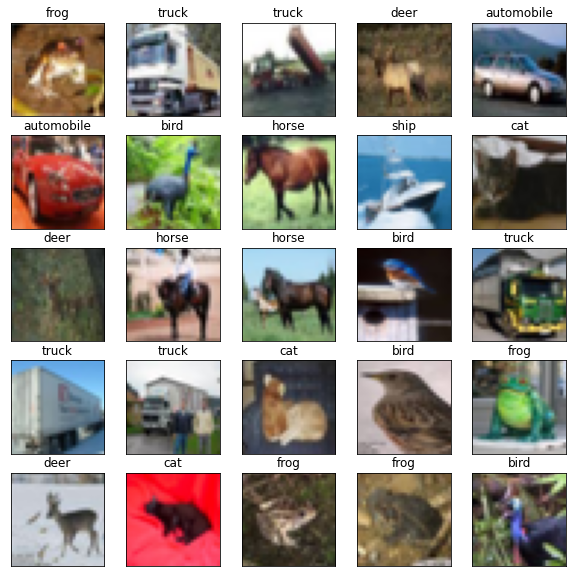

In [61]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

id = 0
for x in range(5):
  for y in range(5):
    axes[x,y].set_title(labels[train_labels[id][0]])
    axes[x,y].imshow(train_images[id], cmap="binary")
    axes[x,y].get_xaxis().set_visible(False)
    axes[x,y].get_yaxis().set_visible(False)
    id += 1
plt.show()

Wytrenować autoenkoder w wykorzystaniem warstw splotowych <br>
warstwa kodująca powinna składać się z nie więcej niż  512 neuronów. <br>
funkcja straty: błąd średniokowadratowy, optimizer SGD <br>
liczba epok uczenia: 100, batch_size= 1024 <br>

Model enkodera (enkoder i dekoder)

In [62]:
input_img = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D(2,2)(x)
x = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D(2,2)(x)

encoder = keras.Model(input_img, encoded)

input_from_encoder = keras.layers.Input(shape=(8,8,32))
x = keras.layers.Conv2DTranspose(32,(3,3), activation='relu', strides=2, padding='same')(input_from_encoder)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2DTranspose(32,(3,3), activation='relu', strides=2, padding='same')(x)
x = keras.layers.BatchNormalization()(x)
decoded = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(input_from_encoder, decoded)

stacked_ae = keras.Sequential([encoder, decoder])
stacked_ae.compile(loss="mean_squared_error",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics='accuracy')

In [63]:
encoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainabl

In [64]:
decoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8, 8, 32)]        0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 16, 16, 32)       9248      
 ranspose)                                                       
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 32, 32, 32)       9248      
 ranspose)                                                       
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                          

In [65]:
stacked_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_14 (Functional)       (None, 8, 8, 32)          10144     
                                                                 
 model_15 (Functional)       (None, 32, 32, 3)         19619     
                                                                 
Total params: 29,763
Trainable params: 29,635
Non-trainable params: 128
_________________________________________________________________


In [66]:
history = stacked_ae.fit(X_train, X_train, epochs=100, batch_size=1024,
                         validation_data=(X_test, X_test))

Epoch 1/100
49/49 [==============================] - 5s 90ms/step - loss: 0.0279 - accuracy: 0.4345 - val_loss: 0.0567 - val_accuracy: 0.3917
Epoch 2/100
49/49 [==============================] - 4s 81ms/step - loss: 0.0125 - accuracy: 0.5725 - val_loss: 0.0611 - val_accuracy: 0.2659
Epoch 3/100
49/49 [==============================] - 4s 81ms/step - loss: 0.0101 - accuracy: 0.6111 - val_loss: 0.0679 - val_accuracy: 0.2655
Epoch 4/100
49/49 [==============================] - 4s 81ms/step - loss: 0.0090 - accuracy: 0.6307 - val_loss: 0.0786 - val_accuracy: 0.3159
Epoch 5/100
49/49 [==============================] - 4s 81ms/step - loss: 0.0083 - accuracy: 0.6471 - val_loss: 0.0816 - val_accuracy: 0.3377
Epoch 6/100
49/49 [==============================] - 4s 81ms/step - loss: 0.0078 - accuracy: 0.6674 - val_loss: 0.0822 - val_accuracy: 0.3756
Epoch 7/100
49/49 [==============================] - 4s 82ms/step - loss: 0.0073 - accuracy: 0.6922 - val_loss: 0.0730 - val_accuracy: 0.4171
Epoch 

Zwizualizować 10-25 przykładów obraz wejściowy - rekonstrukcja

313/313 [==============================] - 1s 2ms/step


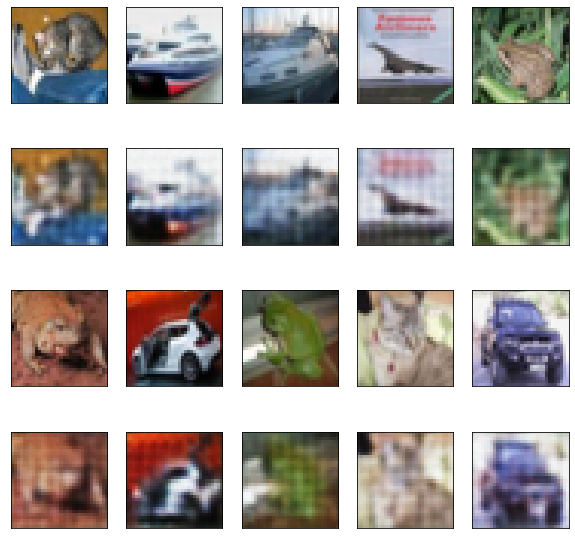

In [67]:
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
reconstruction = stacked_ae.predict(X_test)
for id in range(5):
    axes[0,id].imshow(test_images[id], cmap="binary")
    axes[1,id].imshow(reconstruction[id], cmap="binary")
    axes[2,id].imshow(test_images[id+5], cmap="binary")
    axes[3,id].imshow(reconstruction[id+5], cmap="binary")

for i in range(4):
  for j in range(5):
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)

plt.show()

Zbudować prosty klasyfikator wykorzystujący:

warstwę enkodującą do transformacji wejścia do wektora o rozmiarze 512 (ta warstwa nie będzie zmieniana podczas uczenia)

dwie warstwy gęste: ostatnia z funkcją aktywacji softmax

optimizer SGD, funkcja straty: CategoricalCrossentropy

In [68]:
from keras.utils import np_utils 

Y_train = np_utils.to_categorical(train_labels) 
Y_test = np_utils.to_categorical(test_labels)

In [70]:
# enc_input = keras.layers.Input(shape=[8, 8, 32])
# enc = keras.layers.Conv2D(128, 3, 1, 'same', activation='relu')(enc_input)
# enc = keras.layers.BatchNormalization()(enc)
# enc = keras.layers.Conv2D(32, 3, 1, 'same', activation='relu')(enc)
# enc = keras.layers.BatchNormalization()(enc)
# enc = keras.layers.Flatten()(enc)
# enc = keras.layers.Dense(32, activation='relu')(enc)
# enc = keras.layers.BatchNormalization()(enc)
# enc = keras.layers.Dense(10, activation='softmax')(enc)

# enc_model = keras.Model(enc_input, enc)

# encoder.trainable = False

# classifier = keras.Sequential([encoder, enc_model])

In [82]:
enc_input = keras.layers.Input(shape=[8, 8, 32])
enc = keras.layers.Flatten()(enc_input)
enc = keras.layers.Dense(128, activation='relu')(enc)
enc = keras.layers.Dense(10, activation='softmax')(enc)

enc_model = keras.Model(enc_input, enc)

encoder.trainable = False

classifier = keras.Sequential([encoder, enc_model])

In [83]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_14 (Functional)       (None, 8, 8, 32)          10144     
                                                                 
 model_18 (Functional)       (None, 10)                263562    
                                                                 
Total params: 273,706
Trainable params: 263,562
Non-trainable params: 10,144
_________________________________________________________________


In [84]:
classifier.compile(loss="CategoricalCrossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics='accuracy')

In [85]:
h = classifier.fit(X_train, Y_train, epochs=100, batch_size=1024, validation_data=(X_test, Y_test))

Epoch 1/100
49/49 [==============================] - 1s 24ms/step - loss: 2.1836 - accuracy: 0.2154 - val_loss: 2.0748 - val_accuracy: 0.2948
Epoch 2/100
49/49 [==============================] - 1s 18ms/step - loss: 2.0398 - accuracy: 0.2815 - val_loss: 2.0102 - val_accuracy: 0.2833
Epoch 3/100
49/49 [==============================] - 1s 18ms/step - loss: 1.9607 - accuracy: 0.3116 - val_loss: 1.8991 - val_accuracy: 0.3387
Epoch 4/100
49/49 [==============================] - 1s 18ms/step - loss: 1.9204 - accuracy: 0.3218 - val_loss: 1.8642 - val_accuracy: 0.3615
Epoch 5/100
49/49 [==============================] - 1s 18ms/step - loss: 1.8853 - accuracy: 0.3312 - val_loss: 1.8694 - val_accuracy: 0.3490
Epoch 6/100
49/49 [==============================] - 1s 18ms/step - loss: 1.8404 - accuracy: 0.3476 - val_loss: 1.8067 - val_accuracy: 0.3641
Epoch 7/100
49/49 [==============================] - 1s 20ms/step - loss: 1.8345 - accuracy: 0.3538 - val_loss: 1.8230 - val_accuracy: 0.3462
Epoch 

Zbadać metrykę accuracy na zbiorze testowym (ile obrazów zostało poprawnie
zaklasyfikowanych)

In [86]:
classifier.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4595 - accuracy: 0.4869


[1.4595496654510498, 0.4869000017642975]